### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing Data

In [2]:
# importing data from folders
dataset=pd.read_csv(r"day.csv")

### Explotary Data Analysis

In [3]:
# Checking for null counts
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
# Calculating Mean, Standard Deviation, Minimum Value, Maximum Value and Quartile
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


# Finding the best variables

In [5]:
# Calculating correlation by using Pearson Method 
dataset.corr(method ='pearson')

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.001182,-0.015171,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.001182,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183
workingday,-0.015171,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


In [6]:
# Calculating correlatin Matrix
corr_matrix = dataset.corr().abs()
high_corr_var=np.where(corr_matrix>0.8)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
corr_matrix

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,0.001182,0.015171,0.021862,0.150738,0.152773,0.016080,0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,3.279074e-16,8.310321e-01,0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,0.229607,0.208737,0.410310,0.404584
yr,0.866026,3.279074e-16,1.000000e+00,5.162656e-16,0.008195,0.000685,0.011852,0.050322,0.048789,0.047215,0.112547,0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,5.162656e-16,1.000000e+00,0.018905,0.004059,0.010414,0.045613,0.219083,0.226430,0.224937,0.208013,0.121208,0.291952,0.278191
holiday,0.016275,1.086804e-02,8.195345e-03,1.890483e-02,1.000000,0.020145,0.257009,0.034395,0.028764,0.032703,0.015662,0.006257,0.054055,0.109142,0.068764
weekday,0.001182,4.012478e-03,6.852851e-04,4.059002e-03,0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,0.017230,0.350848,0.199326,0.036183
workingday,0.015171,1.786841e-02,1.185197e-02,1.041372e-02,0.257009,0.001588,1.000000,0.026332,0.002044,0.010657,0.053770,0.002453,0.090369,0.005466,0.027640
weathersit,0.021862,2.130636e-02,5.032247e-02,4.561335e-02,0.034395,0.034216,0.026332,1.000000,0.119503,0.120559,0.590277,0.039769,0.246044,0.259025,0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,0.028764,0.044876,0.002044,0.119503,1.000000,0.991696,0.128565,0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,0.032703,0.037964,0.010657,0.120559,0.991696,1.000000,0.141512,0.183876,0.543362,0.543678,0.630685


In [7]:
# Best Correlated variables are:
# Registered
# casual
# atemp

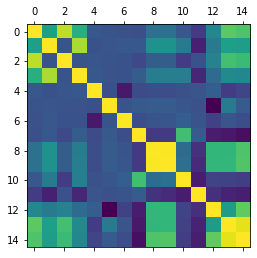

In [8]:
# Correlation Map
plt.matshow(dataset.corr())
plt.show()

# Training the model based on best correlated columns`

In [9]:
# Importing the best correlated Columns

dataset1=pd.read_csv(r"toply corelated.csv")

In [10]:
dataset1

,atemp,casual,registered
0,18.18125,331,654
1,17.68695,131,670
2,9.47025,120,1229
3,10.60610,108,1454
4,11.46350,82,1518
...,...,...,...
725,11.33210,247,1867
726,12.75230,644,2451
727,12.12000,159,1182
728,11.58500,364,1432


### X,y Splitup

In [11]:
X1=dataset1.iloc[ : , : ].values
y1=dataset1.iloc[ : , :].values

### Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.3,random_state=2)

### Model-1 Polynomial Regression

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly=PolynomialFeatures(degree=2)
X_train1=poly.fit_transform(X_train1)
X_test1=poly.transform(X_test1)
regression=LinearRegression()
regression.fit(X_train1,y_train1)
y_pred1=regression.predict(X_test1)


### Calculating Polynomial  Regression Metrics


In [14]:
import sklearn.metrics as metrics
mean_squared_error1=metrics.mean_squared_error(y_pred1,y_test1)
mean_squared_error1

4.690863747230789e-19

In [15]:
mean_absolute_error= metrics.mean_absolute_error(y_pred1,y_test1)
mean_absolute_error

4.802515942848748e-10

In [16]:
import math
Root_mean_square_error=math.sqrt(mean_squared_error1)
Root_mean_square_error

6.84898806191892e-10

### Model-2 Decision Tree Regression


In [17]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=2)
regressor.fit(X_train1,y_train1)
y_pred2=regressor.predict(X_test1)

### Calculating Decision Tree Regression Metrics


In [18]:
import sklearn.metrics as metrics
mean_squared_error=metrics.mean_squared_error(y_pred2,y_test1)
print(mean_squared_error)

8586.093554720503


### Model-3 Ridge regression

In [19]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0)
ridge.fit(X_train1,y_train1)
y_pred3=ridge.predict(X_test1)

C:\Users\VASUDEVAN\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.12845e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


### Calculating Ridge Regression Metrics

In [20]:
import sklearn.metrics as metrics
mean_squared_error=metrics.mean_squared_error(y_pred3,y_test1)
mean_squared_error

8.211538709565568e-07

### Multiple Linear Regression`

In [21]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train1,y_train1)
final_pred=regression.predict(X_test1)

### Calculating Multiple Linear Regression Metrics


In [26]:
import sklearn.metrics as metrics
mean_squared_error2=metrics.mean_squared_error(final_pred,y_test1)
mean_squared_error2

4.690863747230789e-19

In [27]:
mean_absolute_error2= metrics.mean_absolute_error(final_pred,y_test1)
mean_absolute_error2

4.802515942848748e-10

In [28]:
import math
Root_mean_square_error2=math.sqrt(mean_squared_error2)
Root_mean_square_error2

6.84898806191892e-10

In [29]:
metrics.r2_score(final_pred,y_test1)

1.0

# Both Multiple Linear Regression and Polynomial Regression are the best model